In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import scipy as sp
import scipy.fftpack

### FFT Example 1
Source: https://medium.com/@khairulomar/deconstructing-time-series-using-fourier-transform-e52dd535a44e

<StemContainer object of 3 artists>

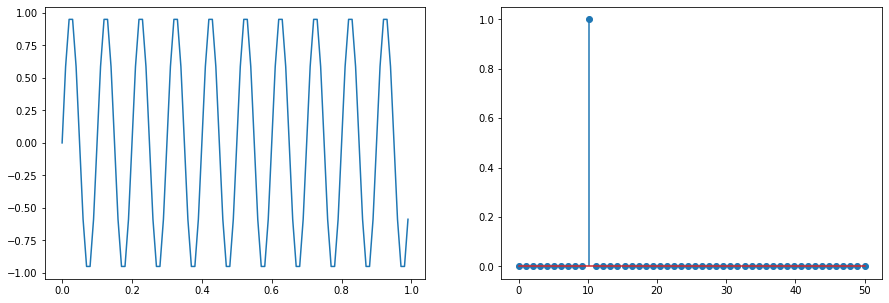

In [5]:
# Frequency and sampling rate
f = 10 # frequency
Fs = 100 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
y = np.sin(2 * np.pi * f * t)
# Perform Fourier transform using scipy
from scipy import fftpack
y_fft = fftpack.fft(y)
# Plot data
n = np.size(t)
fr = Fs/2 * np.linspace(0,1, int(n/2),)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain

### FFT Example 2
Source: https://www.youtube.com/watch?v=s2K1JfNR7Sc&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=20&ab_channel=SteveBrunton

In [6]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

#Create a simple signal with two frequencies
dt = 0.001
t = np.arange(1, 2, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #Sum of two frequencies
f_clean = f
f = f + 2.5 * np.random.randn(len(t))           # add some noise

# plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
# plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
# plt.xlim(t[0],t[-1])
# plt.legend()

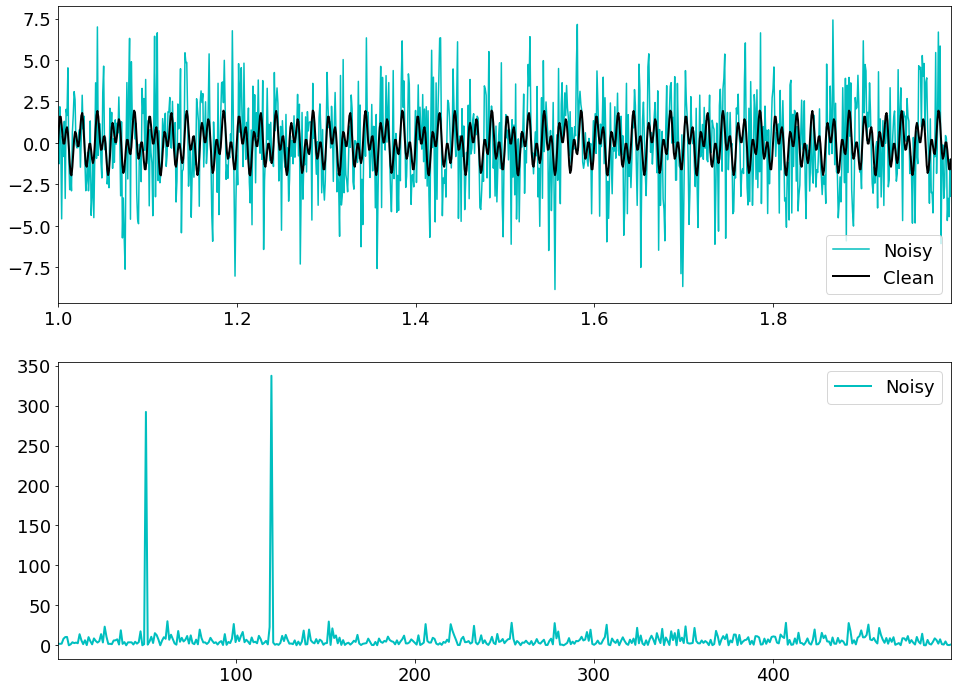

In [7]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)                                  # Total number of samples
fhat = np.fft.fft(f, n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n              # Power spectrum (Power per frequency)
freq = (1/(dt*n)) * np.arange(n)            # Create x-axis of frequencies
L = np.arange(1,np.floor(n/2),dtype='int')  # Only plot the first half of the ...

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()